In [115]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [20]:
train = pd.read_csv('../data/train.csv')
students = pd.read_csv('../data/Student.csv')
internship = pd.read_csv('../data/Internship.csv')
test = pd.read_csv('../data/test.csv')

C:\Users\Abhishek\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_dictionary = pd.read_excel('../data/Data_Dictionary.xlsx')

## Training dataset

In [27]:
train.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Is_Shortlisted
0,8161,78663553,03-01-2015,2-5K,3,NaN,0,0
1,4977,7695797,19-12-2014,5-10K,2,IHFG,1,0
2,10271,78663092,06-01-2015,5-10K,6,NaN,0,0
3,7393,7708503,03-12-2014,2-5K,1,IHFG,0,0
4,11125,78659782,02-01-2015,10K+,6,NaN,1,0


## Data about potential intern

In [24]:
students.head()

,Student_ID,Institute_Category,Institute_location,hometown,Degree,Stream,Current_year,Year_of_graduation,Performance_PG,PG_scale,Performance_UG,UG_Scale,Performance_12th,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date
0,7654321,Y,JADH,IIDB,B.Tech and M.Tech (Dual Degree),Mathematics & Computing,already a graduate,2012,8.5,10,8.6,10,86.2,91.6,job,Software Engineering,IJCE,18-06-2013,21-06-2014
1,7654321,Y,JADH,IIDB,B.Tech and M.Tech (Dual Degree),Mathematics & Computing,already a graduate,2012,8.5,10,8.6,10,86.2,91.6,job,Software Development,IIDB,01-07-2013,NaN
2,7668677,Y,JAHG,IJCE,MBA,BUSINESS MANAGEMENT,1,2016,60.0,100,60.5,100,81.6,90.3,job,Operations Process Consulting + Coding,IIBD,06-05-2013,13-06-2014
3,7668677,Y,JAHG,IJCE,MBA,BUSINESS MANAGEMENT,1,2016,60.0,100,60.5,100,81.6,90.3,job,Product Development,IIBD,08-08-2011,29-03-2013
4,7654322,Y,JACD,JDAE,B.Tech,Biotechnology,already a graduate,2012,0.0,10,7.1,10,87.0,88.0,internship,Research Intern,IIBD,02-06-2010,11-07-2010


## Data about internship opportunities

In [25]:
internship.head()

,Internship_ID,Internship_Profile,Skills_required,Internship_Type,Internship_Location,Internship_category,No_of_openings,Stipend_Type,Stipend1,Stipend2,...,PhoneGap,Storytelling,MySQL.,Ionic,Design Skills,Corporate Sales,Entrepreneurship,Films,Foundation,Payment Gateway
0,6653,Creative Content Writing,NaN,virtual,IIGB,Part time,5,variable,1500,2000,...,0,0,0,0,0,0,0,0,0,0
1,9351,Strategic Philanthropy,NaN,regular,JABD,Part time,5,unpaid,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,8714,Business Development,NaN,regular,IIDB,Part time,10,performance,50,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4575,Creative Writing & Research,Researching And Writing?,virtual,IIGB,Full Time,6,fixed,3000,NaN,...,0,0,0,0,0,0,0,0,0,0
4,10771,Firmware And Networking Development,"TCP/IP,ARM,PIC,Networking,Arduino,Firmware",regular,IIBD,Full Time,5,variable,7000,15000,...,0,0,0,0,0,0,0,0,0,0


## Test set

In [28]:
test.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time
0,9341,7677714,25-01-2015,2-5K,2,IIBD,0
1,6426,7696418,21-01-2015,5-10K,5,NaN,0
2,5812,78666725,09-01-2015,10K+,5,NaN,1
3,10711,7705454,11-01-2015,No Expectations,2,NaN,1
4,5880,7711946,15-01-2015,No Expectations,2,IHFG,1


## Data Dictionary

In [18]:
data_dictionary

,Variable_Name,Definition
0,Internship_ID,Internship_ID; Each internship has a unique id...
1,Student_ID,Student_ID - unique for each student
2,Earliest_Start_Date,Earliest date student can start their Internship
3,Expected_Stipend,Expected stipend by student
4,Minimum_Duration,Months students is available for Internship
5,Preferred_location,Preferred location code
6,Is_Part_Time,Available for Part_time(1)/ Full_Time(0)
7,Is_Shortlisted,"Target Variable (1: Shortlisted, 0: Not Shortl..."


## Class Distribution

In [31]:
train.Is_Shortlisted.value_counts()

0    168003
1     24579
Name: Is_Shortlisted, dtype: int64

## Internship id vs Shortlist

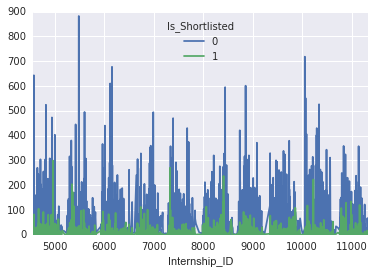

In [116]:
rel_internship_id = train.groupby(['Internship_ID', 'Is_Shortlisted']).size()
rel_internship_id = rel_internship_id.unstack(1).fillna(0)
rel_internship_id.plot();

### Relationship between Expected Stipend and whether intern was shortlisted or not

In [121]:
train.groupby(['Expected_Stipend', 'Is_Shortlisted']).size()

Expected_Stipend  Is_Shortlisted
10K+              0                 34152
                  1                  4245
2-5K              0                 35708
                  1                  6297
5-10K             0                 51345
                  1                  7207
No Expectations   0                 46798
                  1                  6830
dtype: int64

### Does preferred location has any effect whether one would be shortlisted for internship ?

In [123]:
train.columns

Index([u'Internship_ID', u'Student_ID', u'Earliest_Start_Date',
       u'Expected_Stipend', u'Minimum_Duration', u'Preferred_location',
       u'Is_Part_Time', u'Is_Shortlisted'],
      dtype='object')

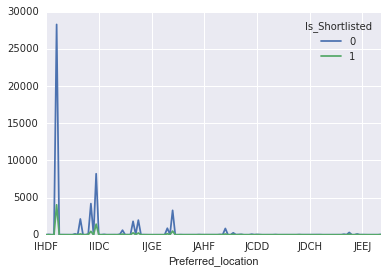

In [128]:
preferred_location = train.groupby(['Preferred_location', 'Is_Shortlisted']).size()
preferred_location = preferred_location.unstack(1).fillna(0)
preferred_location.plot();

## Crosstabulation between Is_Part_Time and Is_Shortlisted

In [32]:
pd.crosstab(train.Is_Part_Time, train.Is_Shortlisted)

Is_Shortlisted,0,1
Is_Part_Time,,
0,112011,14513
1,55992,10066
